## Introduction
Author: Alfeo Sabay
#### For Capstone A Heart Disease Prediction: Sabay, Harris, Bejugama, Dr. Jaceldo
This is an exploration of Machine Learning classification techniques on heart attack prediction. This is preliminary work only for the purposes of having a better understanding of the how modern Data Science techniques can be applied to heart attack prediction.

### Data Description
Data from the cleveland14.csv is used in this analysis. Data Source: UCI Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets/Heart+Disease processed.cleveland.data, processed.hungarian.data, processed.switzerland.data, processed.va.data)

Feature variables:
1. age: continuous
2. sex: categorical, male: 1, female: 0
3. chest_pain: categorical, (1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina)
4. resting_bp: continous (mmHg), resting blood pressure when admitted to hospital.
5. cholesterol: (serum cholesterol level) continuous (mg/dl)
6. fast_bsugar: fasting blood sugar, categorical, 0: <= 120 mg/dl, 1: > 120 mg/dl
7. resting_ecg: resting electrocardiography, categorical, 0: normal, 1: ST-T wave abnormality, 2: leftventricular hypertropy
8. max_hrate: maximum heartrate achieved from thalium test. continuos
9. exer_angina: exercise induced angina. categorical (0:no, 1:yes)
10. oldpeak: ST depression induced by exercise relative to rest. continuous
11. slope: slope of peak exercise ST segment. categorical, 1: upsloping, 2: flat, 3: downsloping
12. ca_mavessel: number of major vessels colored by fluoroscopy: discrete (0,1,2,3,4)
13. heart_def_status: defect status code from thalium test, categorical, 3: normal, 6: fixed defect, 7: reversible defect
14. diag: (response variable) diagnoses of heart disease, categorical, 0: no 1: yes

Credit to Ty Shaikh for an advanced classification project on heart disease using data from UCI ML Repository (https://github.com/ty-shaikh/advanced-classification-example)


In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from pprint import pprint

pd.options.display.html.table_schema = True

matplotlib.rcParams['font.family'] = "Times New Roman"


# Read consolidated heart disease data
columns = ["age", "sex", "chest_pain", "resting_bp", "cholesterol", "fast_bsugar", "resting_ecg", 
           "max_hrate", "exer_angina", "oldpeak", "slope", "ca_mavessel", "heart_def_status", "diag"]
# this loads the original cleveland dataset of 297 x 14
#df_main = pd.read_table("data/cleveland14_capstone.csv", sep=',', header=None, names=columns)

# this loads the Surrogate/Synthesized dataset of 50K x 14 (see https://github.com/alsabay/SynthHD on how this was generated)
df_main = pd.read_table("data/syn_cleveland14.csv", sep=',', header=None, names=columns)

In [5]:
df_main.head()

,age,sex,chest_pain,resting_bp,cholesterol,fast_bsugar,resting_ecg,max_hrate,exer_angina,oldpeak,slope,ca_mavessel,heart_def_status,diag
0,57,0,4,120,267,0,2,117,0,1.0,2,1,3,1
1,63,0,2,102,354,1,0,103,0,1.4,2,2,3,0
2,70,1,4,125,254,0,2,96,0,0.2,2,2,3,1
3,60,0,4,128,264,0,2,142,1,3.0,2,0,7,1
4,57,1,4,165,227,0,2,88,1,1.2,2,1,7,1


In [6]:
df_main[["age", "sex", "chest_pain", "resting_bp", "cholesterol", "fast_bsugar", "resting_ecg", 
           "max_hrate", "exer_angina", "oldpeak", "slope", "ca_mavessel", "heart_def_status", "diag"]] = \
    df_main[["age", "sex", "chest_pain", "resting_bp", "cholesterol", "fast_bsugar", "resting_ecg", 
               "max_hrate", "exer_angina", "oldpeak", "slope", "ca_mavessel", "heart_def_status", "diag"]].astype(float)

### Descriptive Analysis


In [7]:
df_main.head()

,age,sex,chest_pain,resting_bp,cholesterol,fast_bsugar,resting_ecg,max_hrate,exer_angina,oldpeak,slope,ca_mavessel,heart_def_status,diag
0,57.0,0.0,4.0,120.0,267.0,0.0,2.0,117.0,0.0,1.0,2.0,1.0,3.0,1.0
1,63.0,0.0,2.0,102.0,354.0,1.0,0.0,103.0,0.0,1.4,2.0,2.0,3.0,0.0
2,70.0,1.0,4.0,125.0,254.0,0.0,2.0,96.0,0.0,0.2,2.0,2.0,3.0,1.0
3,60.0,0.0,4.0,128.0,264.0,0.0,2.0,142.0,1.0,3.0,2.0,0.0,7.0,1.0
4,57.0,1.0,4.0,165.0,227.0,0.0,2.0,88.0,1.0,1.2,2.0,1.0,7.0,1.0


In [8]:
df_main.dropna(how='any').reset_index(drop=True)

,age,sex,chest_pain,resting_bp,cholesterol,fast_bsugar,resting_ecg,max_hrate,exer_angina,oldpeak,slope,ca_mavessel,heart_def_status,diag
0,57.0,0.0,4.0,120.0,267.0,0.0,2.0,117.0,0.0,1.0,2.0,1.0,3.0,1.0
1,63.0,0.0,2.0,102.0,354.0,1.0,0.0,103.0,0.0,1.4,2.0,2.0,3.0,0.0
2,70.0,1.0,4.0,125.0,254.0,0.0,2.0,96.0,0.0,0.2,2.0,2.0,3.0,1.0
3,60.0,0.0,4.0,128.0,264.0,0.0,2.0,142.0,1.0,3.0,2.0,0.0,7.0,1.0
4,57.0,1.0,4.0,165.0,227.0,0.0,2.0,88.0,1.0,1.2,2.0,1.0,7.0,1.0
5,42.0,0.0,4.0,138.0,243.0,0.0,2.0,181.0,0.0,0.0,1.0,0.0,3.0,0.0
6,57.0,1.0,4.0,128.0,229.0,0.0,0.0,148.0,1.0,1.4,2.0,1.0,7.0,1.0
7,58.0,1.0,3.0,146.0,224.0,1.0,2.0,174.0,0.0,0.0,1.0,0.0,3.0,0.0
8,62.0,1.0,4.0,145.0,212.0,0.0,2.0,132.0,0.0,2.4,2.0,3.0,7.0,1.0
9,41.0,1.0,2.0,120.0,157.0,0.0,0.0,168.0,0.0,0.0,1.0,0.0,7.0,0.0


In [9]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
age                 50000 non-null float64
sex                 50000 non-null float64
chest_pain          50000 non-null float64
resting_bp          50000 non-null float64
cholesterol         50000 non-null float64
fast_bsugar         50000 non-null float64
resting_ecg         50000 non-null float64
max_hrate           50000 non-null float64
exer_angina         50000 non-null float64
oldpeak             50000 non-null float64
slope               50000 non-null float64
ca_mavessel         50000 non-null float64
heart_def_status    50000 non-null float64
diag                50000 non-null float64
dtypes: float64(14)
memory usage: 5.3 MB


In [10]:
df_main.describe(include='all').T.reset_index()

,index,count,mean,std,min,25%,50%,75%,max
0,age,50000.0,54.574600,9.072978,29.0,48.0,56.0,61.0,77.0
1,sex,50000.0,0.673380,0.468982,0.0,0.0,1.0,1.0,1.0
2,chest_pain,50000.0,3.151360,0.964463,1.0,3.0,3.0,4.0,4.0
3,resting_bp,50000.0,131.578220,17.432013,94.0,120.0,130.0,140.0,200.0
4,cholesterol,50000.0,247.519300,52.009264,126.0,212.0,243.0,276.0,564.0
5,fast_bsugar,50000.0,0.148640,0.355737,0.0,0.0,0.0,0.0,1.0
6,resting_ecg,50000.0,1.002120,0.993003,0.0,0.0,1.0,2.0,2.0
7,max_hrate,50000.0,149.450960,23.311256,71.0,133.0,152.0,166.0,202.0
8,exer_angina,50000.0,0.329800,0.470145,0.0,0.0,0.0,1.0,1.0
9,oldpeak,50000.0,1.082292,1.152992,0.0,0.0,0.8,1.8,6.2


In [11]:
pd.isnull(df_main).sum() > 0 # check for nulls or NAN's

age                 False
sex                 False
chest_pain          False
resting_bp          False
cholesterol         False
fast_bsugar         False
resting_ecg         False
max_hrate           False
exer_angina         False
oldpeak             False
slope               False
ca_mavessel         False
heart_def_status    False
diag                False
dtype: bool

### Plots

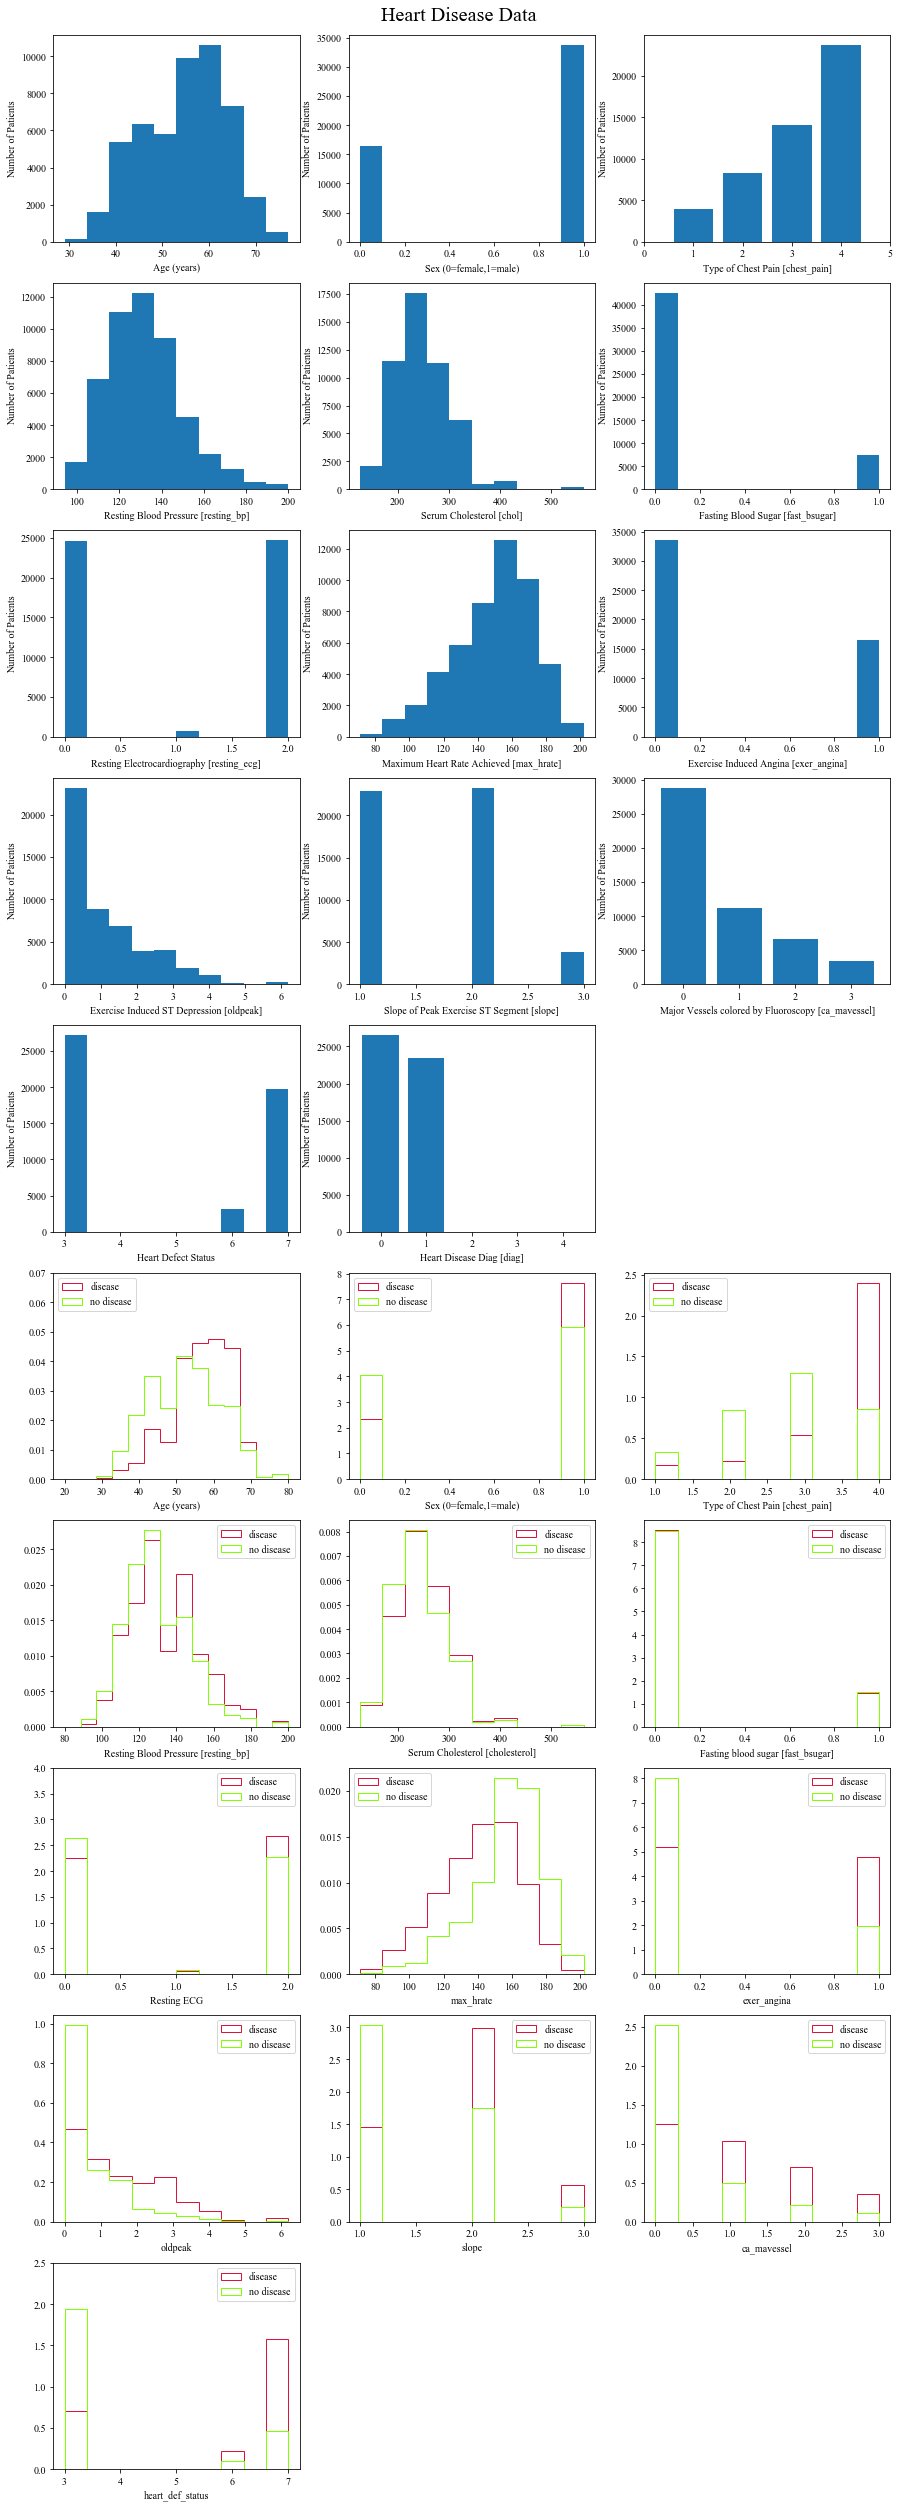

Intrinsic discrepancies between disease and no-disease, in decreasing order: 
   0.531986  (heart_def_status)
   0.480657  (chest_pain)
   0.307304  (ca_mavessel)
   0.292008  (oldpeak)
   0.259786  (max_hrate)
   0.208476  (slope)
   0.173615  (exer_angina)
   0.154116  (age)
   0.065212  (sex)
   0.038452  (resting_bp)
   0.013495  (cholesterol)
   0.013355  (resting_ecg)
   0.000031  (fast_bsugar)

Number of patients in dataframe: 50000, with disease: 23485, without disease: 26515

    age  sex  resting_bp  cholesterol  fast_bsugar  max_hrate  exer_angina  \
0  57.0  0.0       120.0        267.0          0.0      117.0          0.0   
1  63.0  0.0       102.0        354.0          1.0      103.0          0.0   
2  70.0  1.0       125.0        254.0          0.0       96.0          0.0   
3  60.0  0.0       128.0        264.0          0.0      142.0          1.0   
4  57.0  1.0       165.0        227.0          0.0       88.0          1.0   

   oldpeak  ca_mavessel  heart_diag  ches

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

fig, axes = plt.subplots( nrows=10, ncols=3, figsize=(15,40) )
plt.subplots_adjust( wspace=0.20, hspace=0.20, top=0.97 )
plt.suptitle("Heart Disease Data", fontsize=20)
axes[0,0].hist(df_main.age)
axes[0,0].set_xlabel("Age (years)")
axes[0,0].set_ylabel("Number of Patients")
axes[0,1].hist(df_main.sex)
axes[0,1].set_xlabel("Sex (0=female,1=male)")
axes[0,1].set_ylabel("Number of Patients")
axes[0,2].hist(df_main.chest_pain,bins=4,range=(0.5,4.5),rwidth=0.80)
axes[0,2].set_xlim(0.0,5.0)
axes[0,2].set_xlabel("Type of Chest Pain [chest_pain]")
axes[0,2].set_ylabel("Number of Patients")
axes[1,0].hist(df_main.resting_bp)
axes[1,0].set_xlabel("Resting Blood Pressure [resting_bp]")
axes[1,0].set_ylabel("Number of Patients")
axes[1,1].hist(df_main.cholesterol)
axes[1,1].set_xlabel("Serum Cholesterol [chol]")
axes[1,1].set_ylabel("Number of Patients")
axes[1,2].hist(df_main.fast_bsugar)
axes[1,2].set_xlabel("Fasting Blood Sugar [fast_bsugar]")
axes[1,2].set_ylabel("Number of Patients")
axes[2,0].hist(df_main.resting_ecg)
axes[2,0].set_xlabel("Resting Electrocardiography [resting_ecg]")
axes[2,0].set_ylabel("Number of Patients")
axes[2,1].hist(df_main.max_hrate)
axes[2,1].set_xlabel("Maximum Heart Rate Achieved [max_hrate]")
axes[2,1].set_ylabel("Number of Patients")
axes[2,2].hist(df_main.exer_angina)
axes[2,2].set_xlabel("Exercise Induced Angina [exer_angina]")
axes[2,2].set_ylabel("Number of Patients")
axes[3,0].hist(df_main.oldpeak)
axes[3,0].set_xlabel("Exercise Induced ST Depression [oldpeak]")
axes[3,0].set_ylabel("Number of Patients")
axes[3,1].hist(df_main.slope)
axes[3,1].set_xlabel("Slope of Peak Exercise ST Segment [slope]")
axes[3,1].set_ylabel("Number of Patients")
axes[3,2].hist(df_main.ca_mavessel,bins=4,range=(-0.5,3.5),rwidth=0.8)
axes[3,2].set_xlim(-0.7,3.7)
axes[3,2].set_xlabel("Major Vessels colored by Fluoroscopy [ca_mavessel]")
axes[3,2].set_ylabel("Number of Patients")
axes[4,0].hist(df_main.heart_def_status)
axes[4,0].set_xlabel("Heart Defect Status")
axes[4,0].set_ylabel("Number of Patients")
axes[4,1].hist(df_main.diag,bins=5,range=(-0.5,4.5),rwidth=0.8)
axes[4,1].set_xlim(-0.7,4.7)
axes[4,1].set_xlabel("Heart Disease Diag [diag]")
axes[4,1].set_ylabel("Number of Patients")
axes[4,2].axis("off")

# Marginal feature distributions compared for disease and no-disease (likelihoods)
bins = np.linspace(20, 80, 15)
axes[5,0].hist(df_main[df_main.diag>0].age.tolist(),bins,color=["crimson"],histtype="step",label="disease",normed=True)
axes[5,0].hist(df_main[df_main.diag==0].age,bins,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[5,0].set_xlabel("Age (years)")
axes[5,0].set_ylim(0.0,0.070)
axes[5,0].legend(prop={'size': 10},loc="upper left")
axes[5,1].hist(df_main[df_main.diag>0].sex.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[5,1].hist(df_main[df_main.diag==0].sex,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[5,1].set_xlabel("Sex (0=female,1=male)")
axes[5,1].legend(prop={'size': 10},loc="upper left")
axes[5,2].hist(df_main[df_main.diag>0].chest_pain.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[5,2].hist(df_main[df_main.diag==0].chest_pain,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[5,2].set_xlabel("Type of Chest Pain [chest_pain]")
axes[5,2].legend(prop={'size': 10},loc="upper left")
bins = np.linspace(80, 200, 15)
axes[6,0].hist(df_main[df_main.diag>0].resting_bp.tolist(),bins,color=["crimson"],histtype="step",label="disease",normed=True)
axes[6,0].hist(df_main[df_main.diag==0].resting_bp,bins,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[6,0].set_xlabel("Resting Blood Pressure [resting_bp]")
axes[6,0].legend(prop={'size': 10},loc="upper right")
axes[6,1].hist(df_main[df_main.diag>0].cholesterol.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[6,1].hist(df_main[df_main.diag==0].cholesterol,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[6,1].set_xlabel("Serum Cholesterol [cholesterol]")
axes[6,1].legend(prop={'size': 10},loc="upper right")
axes[6,2].hist(df_main[df_main.diag>0].fast_bsugar.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[6,2].hist(df_main[df_main.diag==0].fast_bsugar,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[6,2].set_xlabel("Fasting blood sugar [fast_bsugar]")
axes[6,2].legend(prop={'size': 10},loc="upper right")
axes[7,0].hist(df_main[df_main.diag>0].resting_ecg.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[7,0].hist(df_main[df_main.diag==0].resting_ecg,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[7,0].set_xlabel("Resting ECG")
axes[7,0].set_ylim(0.0,4.0)
axes[7,0].legend(prop={'size': 10},loc="upper right")
axes[7,1].hist(df_main[df_main.diag>0].max_hrate.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[7,1].hist(df_main[df_main.diag==0].max_hrate,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[7,1].set_xlabel("max_hrate")
axes[7,1].legend(prop={'size': 10},loc="upper left")
axes[7,2].hist(df_main[df_main.diag>0].exer_angina.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[7,2].hist(df_main[df_main.diag==0].exer_angina,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[7,2].set_xlabel("exer_angina")
axes[7,2].legend(prop={'size': 10},loc="upper right")
axes[8,0].hist(df_main[df_main.diag>0].oldpeak.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[8,0].hist(df_main[df_main.diag==0].oldpeak,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[8,0].set_xlabel("oldpeak")
axes[8,0].legend(prop={'size': 10},loc="upper right")
axes[8,1].hist(df_main[df_main.diag>0].slope.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[8,1].hist(df_main[df_main.diag==0].slope,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[8,1].set_xlabel("slope")
axes[8,1].legend(prop={'size': 10},loc="upper right")
axes[8,2].hist(df_main[df_main.diag>0].ca_mavessel.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[8,2].hist(df_main[df_main.diag==0].ca_mavessel,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[8,2].set_xlabel("ca_mavessel")
axes[8,2].legend(prop={'size': 10},loc="upper right")
axes[9,0].hist(df_main[df_main.diag>0].heart_def_status.tolist(),color=["crimson"],histtype="step",label="disease",normed=True)
axes[9,0].hist(df_main[df_main.diag==0].heart_def_status,color=["chartreuse"],histtype="step",label="no disease",normed=True)
axes[9,0].set_xlabel("heart_def_status")
axes[9,0].set_ylim(0.0,2.5)
axes[9,0].legend(prop={'size': 10},loc="upper right")
axes[9,1].axis("off")
axes[9,2].axis("off")
plt.show()

# Given two histograms x and y (with the same range and binning), the following function
# calculates the intrinsic discrepancy (a symmetrized Kullback-Leibler distance) between them.

def intrinsic_discrepancy(x,y):
    assert len(x)==len(y)
    sumx = sum(xval for xval in x)
    sumy = sum(yval for yval in y)
    id1  = 0.0
    id2  = 0.0
    for (xval,yval) in zip(x,y):
        if (xval>0) and (yval>0):
            id1 += (float(xval)/sumx) * np.log((float(xval)/sumx)/(float(yval)/sumy))
            id2 += (float(yval)/sumy) * np.log((float(yval)/sumy)/(float(xval)/sumx))
    return min(id1,id2)

# Compute intrinsic discrepancies between disease and no-disease feature distributions
int_discr = {}
hist,bin_edges   = np.histogram(df_main.age,density=False)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].age,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].age,bins=bin_edges,density=False)
int_discr["age"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].sex,bins=(-0.5,0.5,1.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].sex,bins=(-0.5,0.5,1.5),density=False)
int_discr["sex"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].chest_pain,bins=(0.5,1.5,2.5,3.5,4.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].chest_pain,bins=(0.5,1.5,2.5,3.5,4.5),density=False)
int_discr["chest_pain"] = intrinsic_discrepancy(hist1,hist2)
hist,bin_edges   = np.histogram(df_main.resting_bp,density=False)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].resting_bp,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].resting_bp,bins=bin_edges,density=False)
int_discr["resting_bp"] = intrinsic_discrepancy(hist1,hist2)
hist,bin_edges   = np.histogram(df_main.cholesterol,density=False)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].cholesterol,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].cholesterol,bins=bin_edges,density=False)
int_discr["cholesterol"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].fast_bsugar,bins=(-0.5,0.5,1.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].fast_bsugar,bins=(-0.5,0.5,1.5),density=False)
int_discr["fast_bsugar"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].resting_ecg,bins=(-0.5,0.5,1.5,2.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].resting_ecg,bins=(-0.5,0.5,1.5,2.5),density=False)
int_discr["resting_ecg"] = intrinsic_discrepancy(hist1,hist2)
hist,bin_edges   = np.histogram(df_main.max_hrate,density=False)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].max_hrate,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].max_hrate,bins=bin_edges,density=False)
int_discr["max_hrate"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].exer_angina,bins=(-0.5,0.5,1.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].exer_angina,bins=(-0.5,0.5,1.5),density=False)
int_discr["exer_angina"] = intrinsic_discrepancy(hist1,hist2)
hist,bin_edges   = np.histogram(df_main.oldpeak,density=False)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].oldpeak,bins=bin_edges,density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].oldpeak,bins=bin_edges,density=False)
int_discr["oldpeak"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].slope,bins=(0.5,1.5,2.5,3.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].slope,bins=(0.5,1.5,2.5,3.5),density=False)
int_discr["slope"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].ca_mavessel,bins=(-0.5,0.5,1.5,2.5,3.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].ca_mavessel,bins=(-0.5,0.5,1.5,2.5,3.5),density=False)
int_discr["ca_mavessel"] = intrinsic_discrepancy(hist1,hist2)
hist1,bin_edges1 = np.histogram(df_main[df_main.diag>0].heart_def_status,bins=(2.5,3.5,6.5,7.5),density=False)
hist2,bin_edges2 = np.histogram(df_main[df_main.diag==0].heart_def_status,bins=(2.5,3.5,6.5,7.5),density=False)
int_discr["heart_def_status"] = intrinsic_discrepancy(hist1,hist2)
id_list = Counter(int_discr).most_common()

print('Intrinsic discrepancies between disease and no-disease, in decreasing order: ')
for item in id_list:
    print('   %f  (%s)' % (item[1],item[0]))
    
# Data transformation section
# Convert categorical variables with more than two values into dummy variables.
# Note that variable ca is discrete but not categorical, so we don't convert it.
# Standardize and Normalize data
df      = df_main.copy()
dummies = pd.get_dummies(df["chest_pain"],prefix="chest_pain")
df      = df.join(dummies)
del df["chest_pain"]
del df["chest_pain_4.0"]
df      = df.rename(columns = {"chest_pain_1.0":"chest_pain_1","chest_pain_2.0":"chest_pain_2","chest_pain_3.0":"chest_pain_3"})

dummies = pd.get_dummies(df["resting_ecg"],prefix="resting_ecg")
df      = df.join(dummies)
del df["resting_ecg"]
del df["resting_ecg_0.0"]
df      = df.rename(columns = {"resting_ecg_1.0":"resting_ecg_1","resting_ecg_2.0":"resting_ecg_2"})

dummies = pd.get_dummies(df["slope"],prefix="slope")
df      = df.join(dummies)
del df["slope"]
del df["slope_2.0"]
df      = df.rename(columns = {"slope_1.0":"slope_1","slope_3.0":"slope_3"})

dummies = pd.get_dummies(df["heart_def_status"],prefix="heart_def_status")
df      = df.join(dummies)
del df["heart_def_status"]
del df["heart_def_status_3.0"]
df      = df.rename(columns = {"heart_def_status_6.0":"heart_def_status_6","heart_def_status_7.0":"heart_def_status_7"})

# Replace response variable values and rename
df["diag"].replace(to_replace=[1,2,3,4],value=1,inplace=True)
df      = df.rename(columns = {"diag":"heart_diag"})

# New list of column labels after the above operations
new_columns_1 = ["age", "sex", "resting_bp", "cholesterol", "fast_bsugar", "max_hrate", 
                 "exer_angina", "oldpeak", "ca_mavessel", "heart_diag", "chest_pain_1", "chest_pain_2",
                 "chest_pain_3", "resting_ecg_1", "resting_ecg_2", "slope_1", "slope_3",
                 "heart_def_status_6", "heart_def_status_7"]

print('\nNumber of patients in dataframe: %i, with disease: %i, without disease: %i\n' \
      % (len(df.index),len(df[df.heart_diag==1].index),len(df[df.heart_diag==0].index)))
print(df.head())
print(df.describe())

# Standardize the dataframe
stdcols = ["age","resting_bp","cholesterol","max_hrate","oldpeak"]
nrmcols = ["ca_mavessel"]
stddf   = df.copy()
scl = StandardScaler()
nrm = Normalizer()

'''stddf[stdcols] = stddf[stdcols].apply(lambda x: (x-x.mean())/x.std())
stddf[nrmcols] = stddf[nrmcols].apply(lambda x: (x-x.mean())/(x.max()-x.min()))'''

stddf[stdcols] = scl.fit_transform(stddf[stdcols])
stddf[nrmcols] = nrm.fit_transform(stddf[nrmcols])

new_columns_2 = new_columns_1[:9] + new_columns_1[10:]
new_columns_2.insert(0,new_columns_1[9])
stddf = stddf.reindex(columns=new_columns_2)

# Convert dataframe into lists for use by classifiers
yall = stddf["heart_diag"]
Xall = stddf[new_columns_2[1:]].values

In [17]:
stddf.head()

,heart_diag,age,sex,resting_bp,cholesterol,fast_bsugar,max_hrate,exer_angina,oldpeak,ca_mavessel,chest_pain_1,chest_pain_2,chest_pain_3,resting_ecg_1,resting_ecg_2,slope_1,slope_3,heart_def_status_6,heart_def_status_7
0,1.0,0.267324,0.0,-0.664200,0.374566,0.0,-1.392086,0.0,-0.071373,1.0,0,0,0,0,1,0,0,0,0
1,0.0,0.928635,0.0,-1.696793,2.047361,1.0,-1.992661,0.0,0.275554,1.0,0,1,0,0,0,0,0,0,0
2,1.0,1.700164,1.0,-0.377368,0.124608,0.0,-2.292948,0.0,-0.765227,1.0,0,0,0,0,1,0,0,0,0
3,1.0,0.597979,0.0,-0.205269,0.316883,0.0,-0.319632,1.0,1.663261,0.0,0,0,0,0,1,0,0,0,1
4,1.0,0.267324,1.0,1.917284,-0.394536,0.0,-2.636133,1.0,0.102090,1.0,0,0,0,0,1,0,0,0,1


In [18]:
stddf.describe().T

,count,mean,std,min,25%,50%,75%,max
heart_diag,50000.0,4.697000e-01,0.499086,0.000000,0.000000,0.000000,1.000000,1.000000
age,50000.0,3.612399e-16,1.000010,-2.818794,-0.724643,0.157105,0.708198,2.471694
sex,50000.0,6.733800e-01,0.468982,0.000000,0.000000,1.000000,1.000000,1.000000
resting_bp,50000.0,7.059953e-16,1.000010,-2.155723,-0.664200,-0.090537,0.483126,3.925104
cholesterol,50000.0,2.478373e-16,1.000010,-2.336517,-0.682949,-0.086895,0.547614,6.085144
fast_bsugar,50000.0,1.486400e-01,0.355737,0.000000,0.000000,0.000000,0.000000,1.000000
max_hrate,50000.0,-3.887379e-16,1.000010,-3.365402,-0.705716,0.109349,0.709923,2.254257
exer_angina,50000.0,3.298000e-01,0.470145,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,50000.0,1.676881e-16,1.000010,-0.938691,-0.938691,-0.244837,0.622481,4.438677
ca_mavessel,50000.0,4.234600e-01,0.494112,0.000000,0.000000,0.000000,1.000000,1.000000


### Logistic Regression with 10 fold cross-validation

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    8.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score: 0.823
Best parameters set:
	clf__C: 10
('Accuracy:', 0.82672)
('Precision:', 0.8312378253940145)
('Recall:', 0.7946504147621466)
	clf__penalty: 'l1'
('Accuracy:', 0.82672)
('Precision:', 0.8312378253940145)
('Recall:', 0.7946504147621466)
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    7.9s finished


('====Iteration', 0, ' ====')
('accuracy', 0.8241)
('Precision:', 0.8204624781849913)
('Recall:', 0.8007238662976368)
('confusion matrix\n', array([[4480,  823],
       [ 936, 3761]]))
Confusion matrix, without normalization
[[4480  823]
 [ 936 3761]]
Normalized confusion matrix
[[0.84 0.16]
 [0.2  0.8 ]]


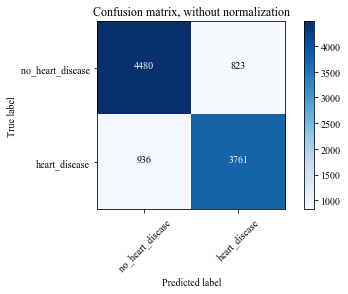

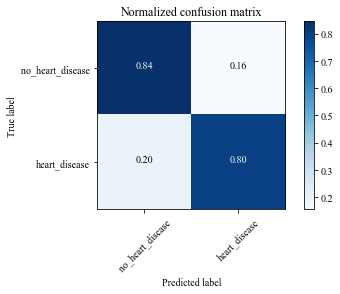

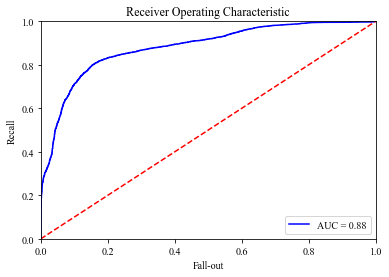

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    8.3s finished


('====Iteration', 1, ' ====')
('accuracy', 0.8208)
('Precision:', 0.8154180238870793)
('Recall:', 0.7994464551841601)
('confusion matrix\n', array([[4453,  850],
       [ 942, 3755]]))
Confusion matrix, without normalization
[[4453  850]
 [ 942 3755]]
Normalized confusion matrix
[[0.84 0.16]
 [0.2  0.8 ]]


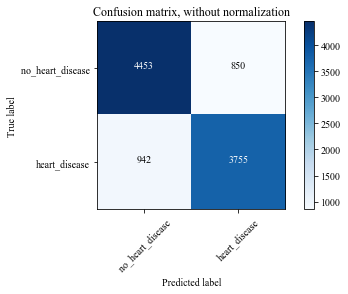

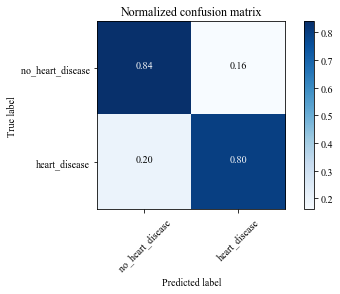

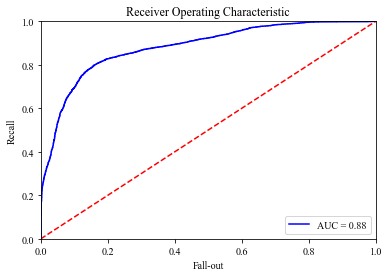

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    8.3s finished


('====Iteration', 2, ' ====')
('accuracy', 0.8207)
('Precision:', 0.8157894736842105)
('Recall:', 0.7985948477751756)
('confusion matrix\n', array([[4456,  847],
       [ 946, 3751]]))
Confusion matrix, without normalization
[[4456  847]
 [ 946 3751]]
Normalized confusion matrix
[[0.84 0.16]
 [0.2  0.8 ]]


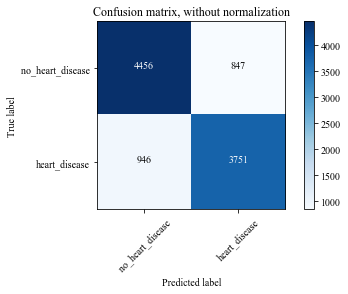

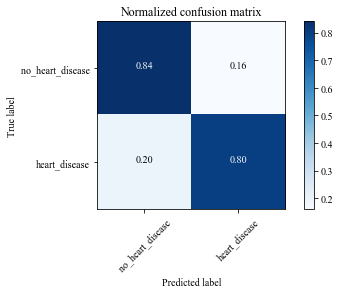

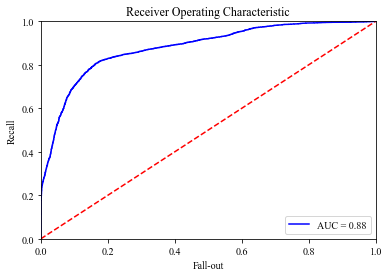

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    8.0s finished


('====Iteration', 3, ' ====')
('accuracy', 0.8225)
('Precision:', 0.8209578207381371)
('Recall:', 0.79561422184373)
('confusion matrix\n', array([[4488,  815],
       [ 960, 3737]]))
Confusion matrix, without normalization
[[4488  815]
 [ 960 3737]]
Normalized confusion matrix
[[0.85 0.15]
 [0.2  0.8 ]]


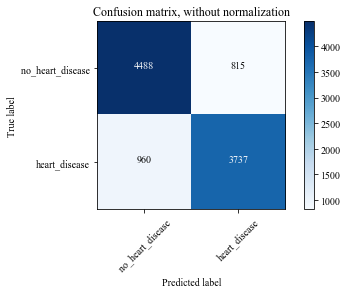

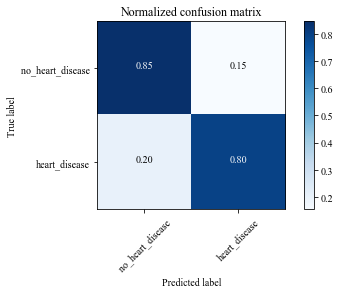

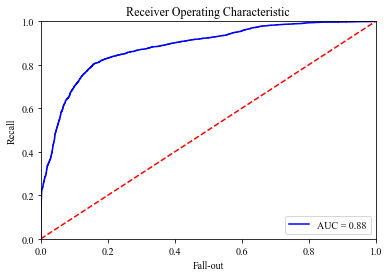

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    7.8s finished


('====Iteration', 4, ' ====')
('accuracy', 0.8268)
('Precision:', 0.8250383687787766)
('Recall:', 0.801149670002129)
('confusion matrix\n', array([[4505,  798],
       [ 934, 3763]]))
Confusion matrix, without normalization
[[4505  798]
 [ 934 3763]]
Normalized confusion matrix
[[0.85 0.15]
 [0.2  0.8 ]]


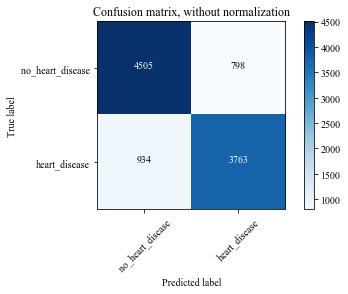

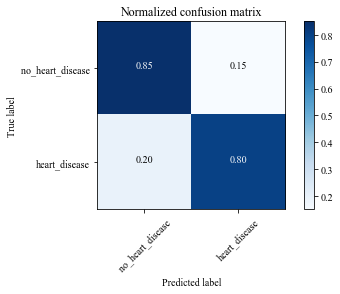

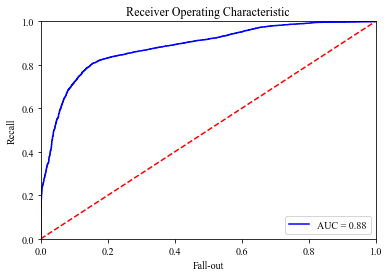

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    8.2s finished


('====Iteration', 5, ' ====')
('accuracy', 0.8202)
('Precision:', 0.8161395856052345)
('Recall:', 0.7966787311049606)
('confusion matrix\n', array([[4460,  843],
       [ 955, 3742]]))
Confusion matrix, without normalization
[[4460  843]
 [ 955 3742]]
Normalized confusion matrix
[[0.84 0.16]
 [0.2  0.8 ]]


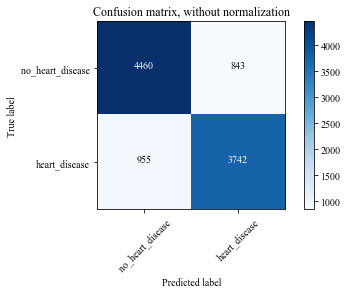

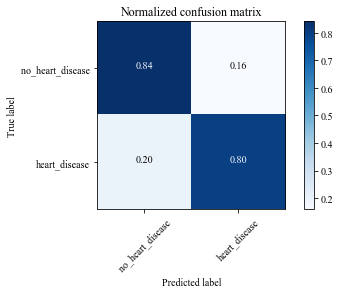

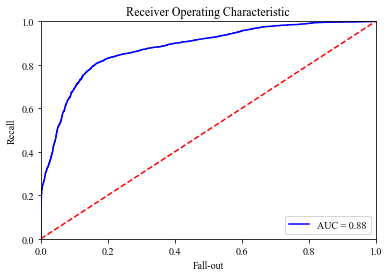

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    8.9s finished


('====Iteration', 6, ' ====')
('accuracy', 0.8299)
('Precision:', 0.8290861159929701)
('Recall:', 0.8034915903768363)
('confusion matrix\n', array([[4525,  778],
       [ 923, 3774]]))
Confusion matrix, without normalization
[[4525  778]
 [ 923 3774]]
Normalized confusion matrix
[[0.85 0.15]
 [0.2  0.8 ]]


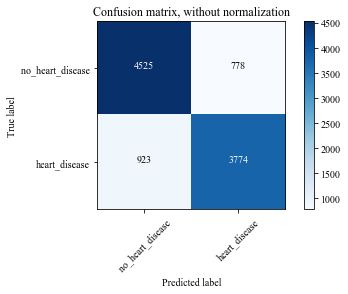

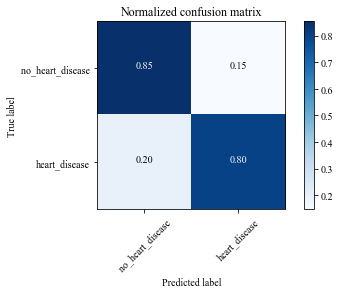

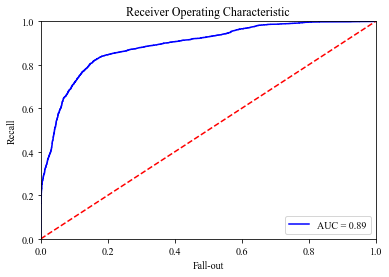

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    8.6s finished


('====Iteration', 7, ' ====')
('accuracy', 0.8207)
('Precision:', 0.8177242888402626)
('Recall:', 0.79561422184373)
('confusion matrix\n', array([[4470,  833],
       [ 960, 3737]]))
Confusion matrix, without normalization
[[4470  833]
 [ 960 3737]]
Normalized confusion matrix
[[0.84 0.16]
 [0.2  0.8 ]]


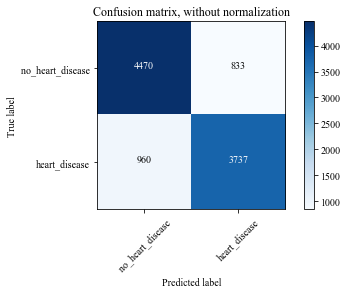

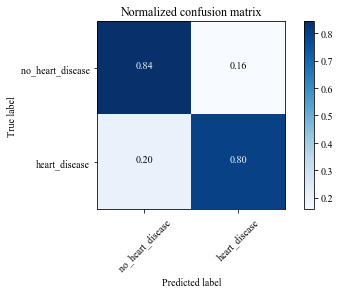

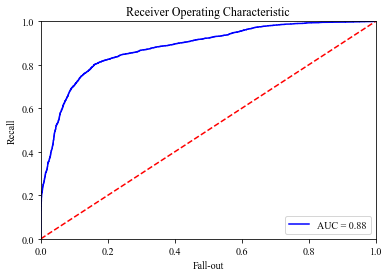

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    8.6s finished


('====Iteration', 8, ' ====')
('accuracy', 0.824)
('Precision:', 0.8180636777128005)
('Recall:', 0.8041302959335747)
('confusion matrix\n', array([[4463,  840],
       [ 920, 3777]]))
Confusion matrix, without normalization
[[4463  840]
 [ 920 3777]]
Normalized confusion matrix
[[0.84 0.16]
 [0.2  0.8 ]]


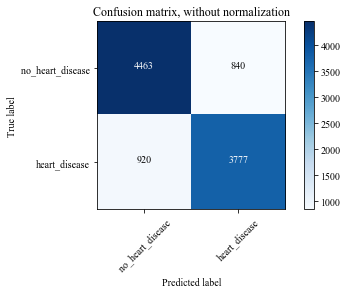

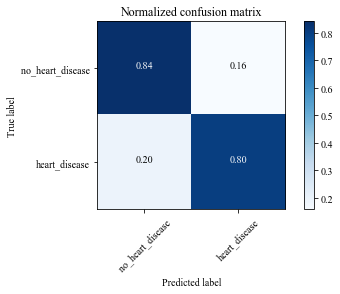

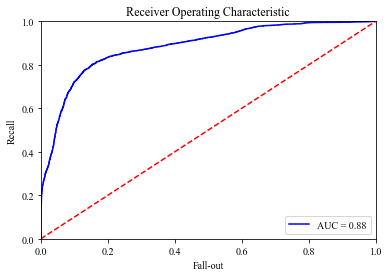

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   10.1s finished


('====Iteration', 9, ' ====')
('accuracy', 0.8248)
('Precision:', 0.8165985809503332)
('Recall:', 0.808601234830743)
('confusion matrix\n', array([[4450,  853],
       [ 899, 3798]]))
Confusion matrix, without normalization
[[4450  853]
 [ 899 3798]]
Normalized confusion matrix
[[0.84 0.16]
 [0.19 0.81]]


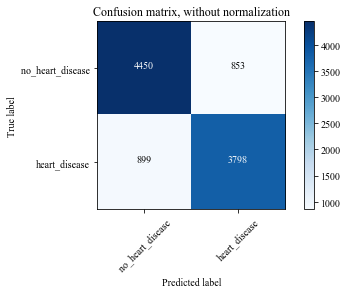

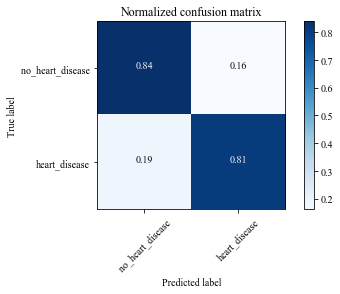

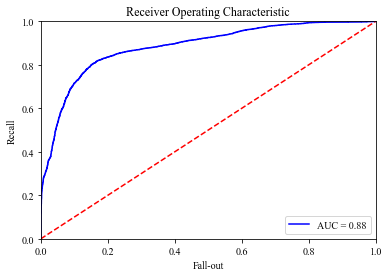

In [20]:
# Logistic Regression with 10 fold cross-validation
import numpy as np
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics as mt
from sklearn.model_selection import StratifiedShuffleSplit as ssplt
from sklearn.model_selection import StratifiedKFold as skfold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import plotly.plotly as py
import plotly.tools as tls



yhat = np.zeros(yall.shape) # prediction bucket
num_cv_iterations = 10
num_instances = len(yall)
cv_object = ssplt(n_splits=num_cv_iterations,
                         test_size  = 0.2)

# Use GridSearchCV to find optimal hyperparameters, then use it in validation loop
X_train, X_test, y_train, y_test = train_test_split(Xall, yall)

pipeline = Pipeline([('clf', LogisticRegression())])
parameters = {
'clf__penalty': ('l1','l2'),
'clf__C': (0.01, 0.1, 1, 10),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=1,verbose=1, scoring='accuracy', cv=num_cv_iterations)
# X_train, X_test, y_train, y_test = train_test_split(Xall, yall)
grid_search.fit(X_train, y_train)
print('Best score: %0.3f' % grid_search.best_score_)
print('Best parameters set:') 
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))
    predictions = grid_search.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, predictions))
    print('Precision:', precision_score(y_test, predictions))
    print('Recall:', recall_score(y_test, predictions))

# Use cv_object to cross-validate using the grid_search object's tuned parameters
iter_num=0
# the indices are the rows used for training and testing in each iteration

# accumulate results 
lr_accuracy = np.zeros(num_cv_iterations)
lr_precision = np.zeros(num_cv_iterations)
lr_recall = np.zeros(num_cv_iterations)

for train_indices, test_indices in cv_object.split(Xall,yall): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = Xall[train_indices]
    y_train = yall[train_indices]
    
    X_test = Xall[test_indices]
    y_test = yall[test_indices]
    
    # train the reusable logisitc regression model on the training data
    grid_search.fit(X_train,y_train)  # train object
    y_hat = grid_search.predict(X_test) # get test set predictions
    
    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    prec = precision_score(y_test, y_hat)
    rec = recall_score(y_test, y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    
    # accumulate results
    lr_accuracy[iter_num] = acc
    lr_precision[iter_num] = prec
    lr_recall[iter_num] = rec
    
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print('Precision:', prec)
    print('Recall:', rec)
    print("confusion matrix\n",conf)
    iter_num+=1
    y_pred = grid_search.predict(X_test)
    
    # plot confusion matrix
    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

    # Compute confusion matrix
    class_names = ['no_heart_disease','heart_disease']
    cnf_matrix = confusion_matrix(y_test, y_pred)

    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()
    
    # plot ROC Curve
    predictions = grid_search.predict_proba(X_test)
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions[:, 1])
    roc_auc = auc(false_positive_rate, recall)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out')
    plt.show()
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time'''






### Decision Tree Classification with 10 fold cross-validation
Seems both precision and recall dropped with DT (entropy and gini)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   26.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best score: 0.812
Best parameters set:
	clf__max_depth: 300
	clf__min_samples_leaf: 3
	clf__min_samples_split: 2
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  66 out of  81 | elapsed:    1.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    2.0s finished


('====Iteration', 0, ' ====')
('accuracy', 0.8233)
('Precision:', 0.8207092819614711)
('Recall:', 0.7981690440706835)
('confusion matrix\n', array([[4484,  819],
       [ 948, 3749]]))
Confusion matrix, without normalization
[[4484  819]
 [ 948 3749]]
Normalized confusion matrix
[[0.85 0.15]
 [0.2  0.8 ]]


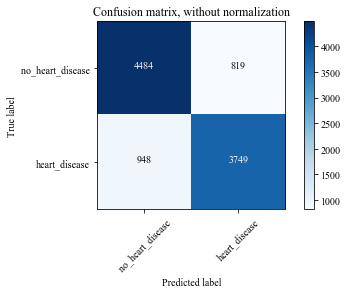

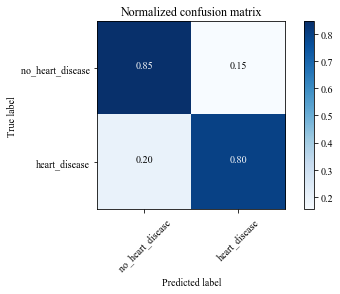

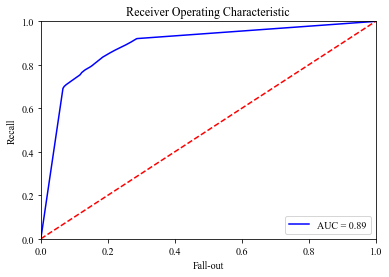

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  66 out of  81 | elapsed:    2.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    2.3s finished


('====Iteration', 1, ' ====')
('accuracy', 0.823)
('Precision:', 0.8255839822024471)
('Recall:', 0.7900787736853311)
('confusion matrix\n', array([[4519,  784],
       [ 986, 3711]]))
Confusion matrix, without normalization
[[4519  784]
 [ 986 3711]]
Normalized confusion matrix
[[0.85 0.15]
 [0.21 0.79]]


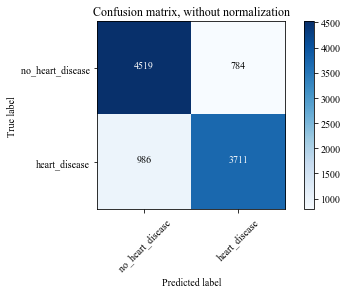

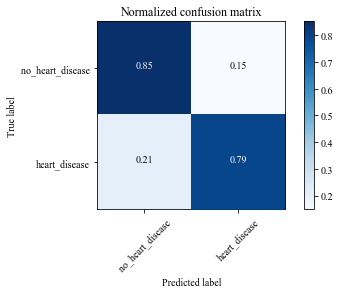

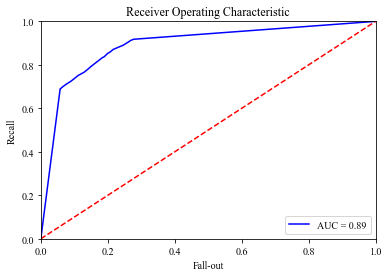

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    2.5s finished


('====Iteration', 2, ' ====')
('accuracy', 0.8237)
('Precision:', 0.8184976118106817)
('Recall:', 0.8026399829678518)
('confusion matrix\n', array([[4467,  836],
       [ 927, 3770]]))
Confusion matrix, without normalization
[[4467  836]
 [ 927 3770]]
Normalized confusion matrix
[[0.84 0.16]
 [0.2  0.8 ]]


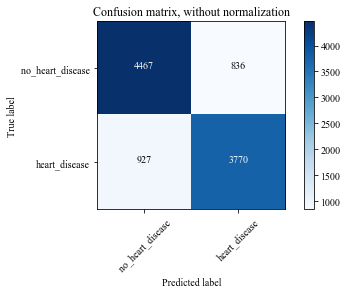

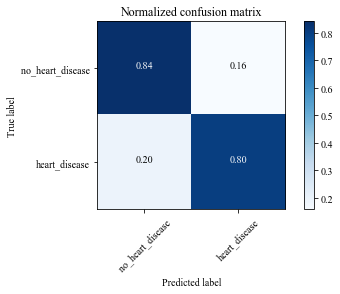

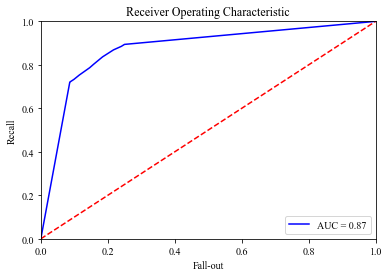

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    2.5s finished


('====Iteration', 3, ' ====')
('accuracy', 0.8242)
('Precision:', 0.8237497246089447)
('Recall:', 0.7960400255482223)
('confusion matrix\n', array([[4503,  800],
       [ 958, 3739]]))
Confusion matrix, without normalization
[[4503  800]
 [ 958 3739]]
Normalized confusion matrix
[[0.85 0.15]
 [0.2  0.8 ]]


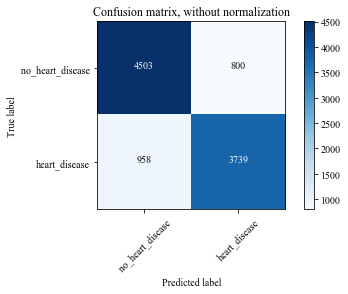

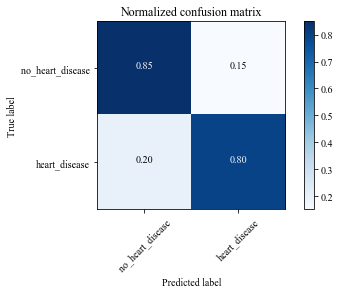

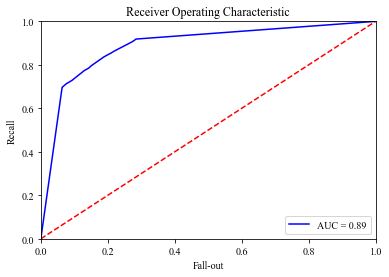

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    2.5s finished


('====Iteration', 4, ' ====')
('accuracy', 0.8295)
('Precision:', 0.8311199645861)
('Recall:', 0.7994464551841601)
('confusion matrix\n', array([[4540,  763],
       [ 942, 3755]]))
Confusion matrix, without normalization
[[4540  763]
 [ 942 3755]]
Normalized confusion matrix
[[0.86 0.14]
 [0.2  0.8 ]]


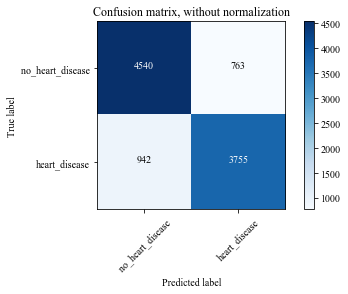

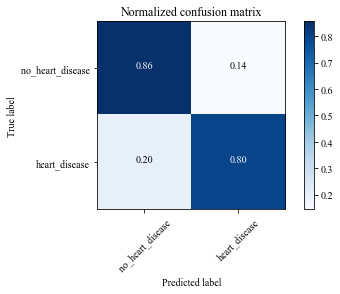

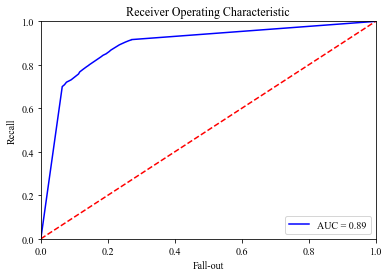

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    2.5s finished


('====Iteration', 5, ' ====')
('accuracy', 0.821)
('Precision:', 0.8181221273801708)
('Recall:', 0.7958271236959762)
('confusion matrix\n', array([[4472,  831],
       [ 959, 3738]]))
Confusion matrix, without normalization
[[4472  831]
 [ 959 3738]]
Normalized confusion matrix
[[0.84 0.16]
 [0.2  0.8 ]]


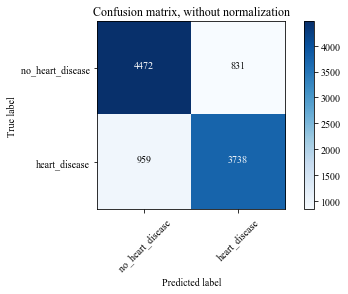

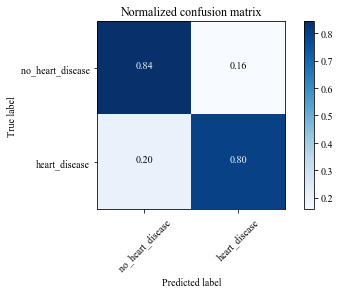

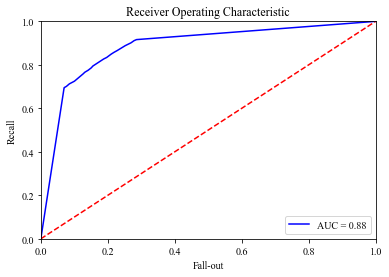

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    2.5s finished


('====Iteration', 6, ' ====')
('accuracy', 0.8269)
('Precision:', 0.825076720736519)
('Recall:', 0.8013625718543751)
('confusion matrix\n', array([[4505,  798],
       [ 933, 3764]]))
Confusion matrix, without normalization
[[4505  798]
 [ 933 3764]]
Normalized confusion matrix
[[0.85 0.15]
 [0.2  0.8 ]]


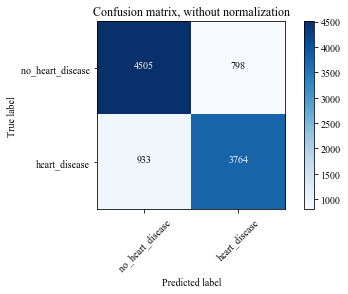

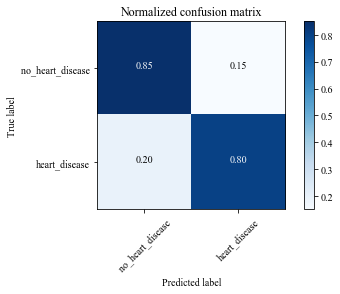

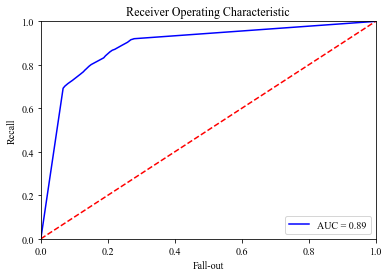

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    2.5s finished


('====Iteration', 7, ' ====')
('accuracy', 0.8272)
('Precision:', 0.8305499888666221)
('Recall:', 0.7941239088780072)
('confusion matrix\n', array([[4542,  761],
       [ 967, 3730]]))
Confusion matrix, without normalization
[[4542  761]
 [ 967 3730]]
Normalized confusion matrix
[[0.86 0.14]
 [0.21 0.79]]


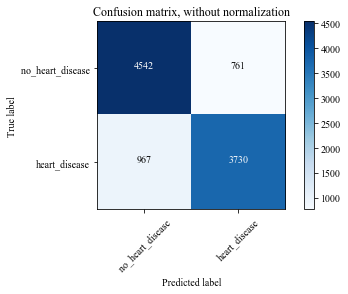

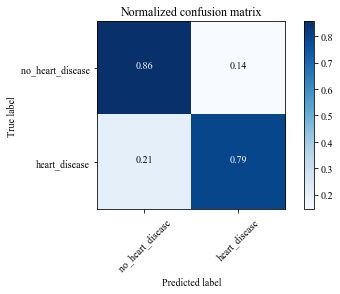

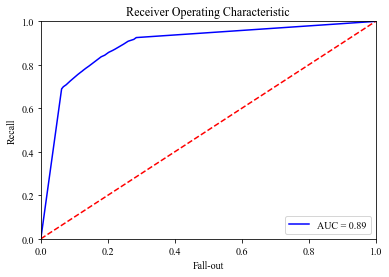

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    2.5s finished


('====Iteration', 8, ' ====')
('accuracy', 0.8251)
('Precision:', 0.8256738842244807)
('Recall:', 0.79561422184373)
('confusion matrix\n', array([[4514,  789],
       [ 960, 3737]]))
Confusion matrix, without normalization
[[4514  789]
 [ 960 3737]]
Normalized confusion matrix
[[0.85 0.15]
 [0.2  0.8 ]]


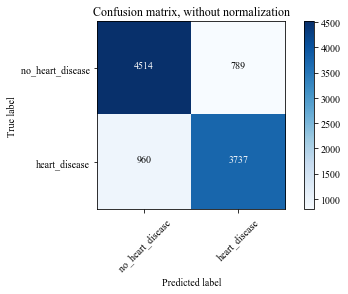

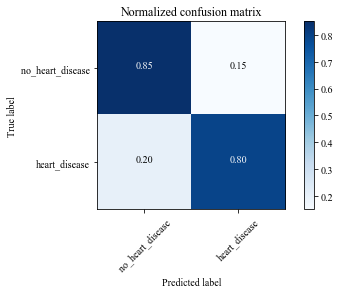

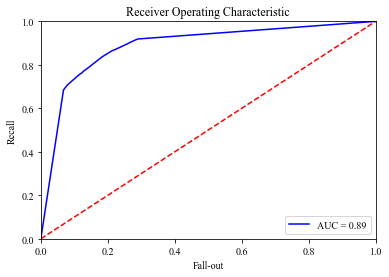

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  66 out of  81 | elapsed:    2.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    2.3s finished


('====Iteration', 9, ' ====')
('accuracy', 0.8284)
('Precision:', 0.8242331955623232)
('Recall:', 0.806685118160528)
('confusion matrix\n', array([[4495,  808],
       [ 908, 3789]]))
Confusion matrix, without normalization
[[4495  808]
 [ 908 3789]]
Normalized confusion matrix
[[0.85 0.15]
 [0.19 0.81]]


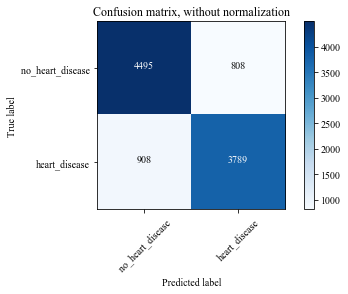

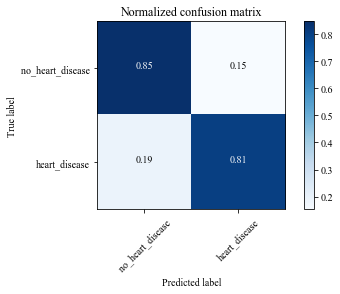

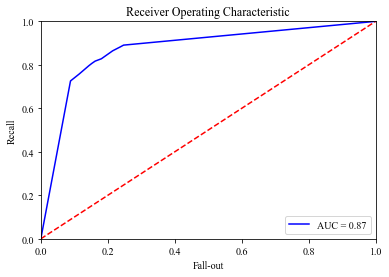

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(Xall, yall)
# Fine tune hyperparameters of classifier for best score
pipeline = Pipeline([('clf', DecisionTreeClassifier(criterion='entropy'))])
parameters = {
'clf__max_depth': (300, 400, 500),
'clf__min_samples_split': (2, 3, 4),
'clf__min_samples_leaf': (2, 3, 4)
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)
print ('Best score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

# Cross validation section
iter_num=0

# accumulate results 
dt_accuracy = np.zeros(num_cv_iterations)
dt_precision = np.zeros(num_cv_iterations)
dt_recall = np.zeros(num_cv_iterations)

# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(Xall,yall): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = Xall[train_indices]
    y_train = yall[train_indices]
    
    X_test = Xall[test_indices]
    y_test = yall[test_indices]
    
    # train the reusable logisitc regression model on the training data
    grid_search.fit(X_train,y_train)  # train object
    y_hat = grid_search.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    prec = precision_score(y_test, y_hat)
    rec = recall_score(y_test, y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    
    # accumulate results
    dt_accuracy[iter_num] = acc
    dt_precision[iter_num] = prec
    dt_recall[iter_num] = rec
    
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print('Precision:', prec)
    print('Recall:', rec)
    print("confusion matrix\n",conf)
    iter_num+=1
    y_pred = grid_search.predict(X_test)
    
    # plot confusion matrix
    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

    # Compute confusion matrix
    class_names = ['no_heart_disease','heart_disease']
    cnf_matrix = confusion_matrix(y_test, y_pred)

    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()
    
    # plot ROC Curve
    predictions = grid_search.predict_proba(X_test)
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions[:, 1])
    roc_auc = auc(false_positive_rate, recall)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out')
    plt.show()
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time'''

### Random Forest Classifier with 10 fold cross-validation
Slightly improved precision and recall (does better with gini)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    6.4s finished
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Best score: 0.835
Best parameters set:
	clf__max_depth: 500
	clf__min_samples_leaf: 4
	clf__min_samples_split: 2
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    6.5s finished


('====Iteration', 0, ' ====')
('accuracy', 0.843)
('Precision:', 0.8641975308641975)
('Recall:', 0.789865871833085)
('confusion matrix\n', array([[4720,  583],
       [ 987, 3710]]))
Confusion matrix, without normalization
[[4720  583]
 [ 987 3710]]
Normalized confusion matrix
[[0.89 0.11]
 [0.21 0.79]]


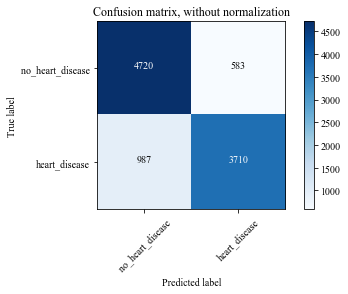

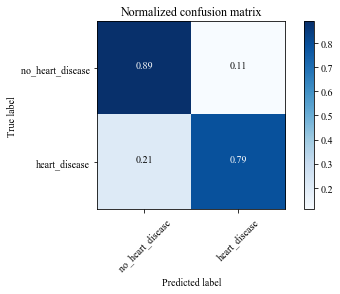

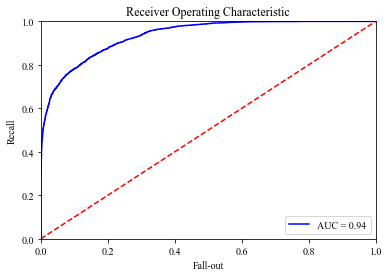

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    6.2s finished


('====Iteration', 1, ' ====')
('accuracy', 0.8545)
('Precision:', 0.866908103214124)
('Recall:', 0.8154140941026187)
('confusion matrix\n', array([[4715,  588],
       [ 867, 3830]]))
Confusion matrix, without normalization
[[4715  588]
 [ 867 3830]]
Normalized confusion matrix
[[0.89 0.11]
 [0.18 0.82]]


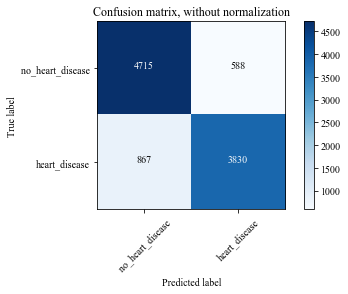

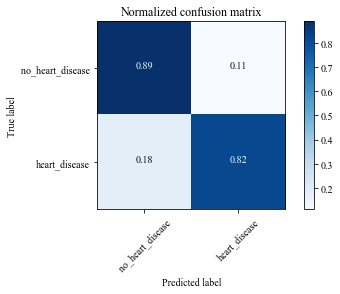

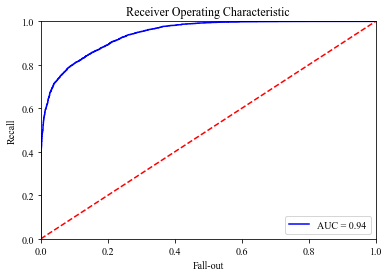

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    6.3s finished


('====Iteration', 2, ' ====')
('accuracy', 0.8449)
('Precision:', 0.8528488111260655)
('Recall:', 0.8094528422397275)
('confusion matrix\n', array([[4647,  656],
       [ 895, 3802]]))
Confusion matrix, without normalization
[[4647  656]
 [ 895 3802]]
Normalized confusion matrix
[[0.88 0.12]
 [0.19 0.81]]


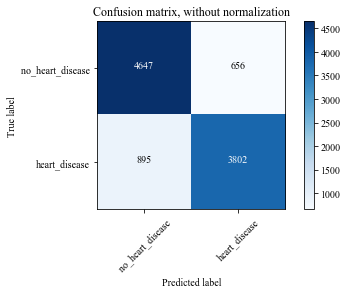

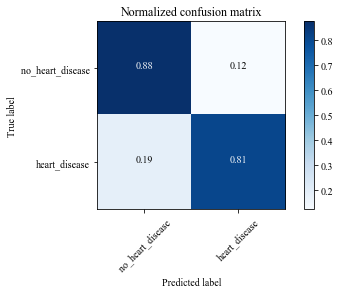

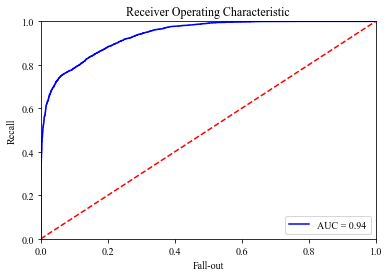

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    6.4s finished


('====Iteration', 3, ' ====')
('accuracy', 0.8513)
('Precision:', 0.8631221719457014)
('Recall:', 0.812220566318927)
('confusion matrix\n', array([[4698,  605],
       [ 882, 3815]]))
Confusion matrix, without normalization
[[4698  605]
 [ 882 3815]]
Normalized confusion matrix
[[0.89 0.11]
 [0.19 0.81]]


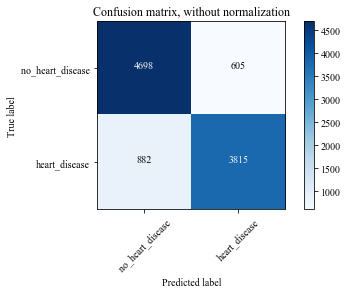

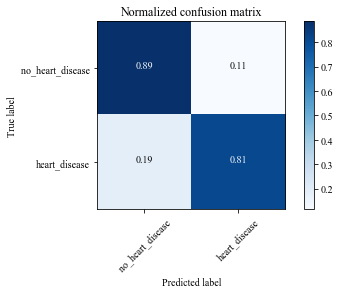

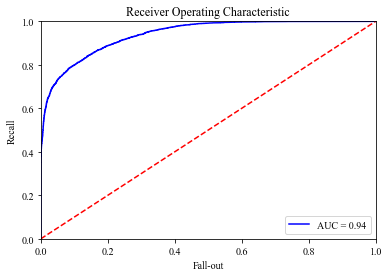

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    6.3s finished


('====Iteration', 4, ' ====')
('accuracy', 0.8453)
('Precision:', 0.8452433143358177)
('Recall:', 0.8209495422610177)
('confusion matrix\n', array([[4597,  706],
       [ 841, 3856]]))
Confusion matrix, without normalization
[[4597  706]
 [ 841 3856]]
Normalized confusion matrix
[[0.87 0.13]
 [0.18 0.82]]


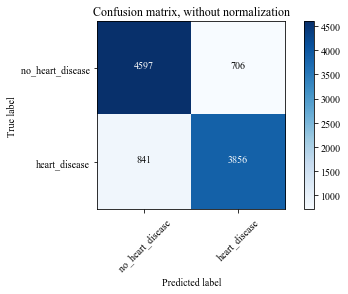

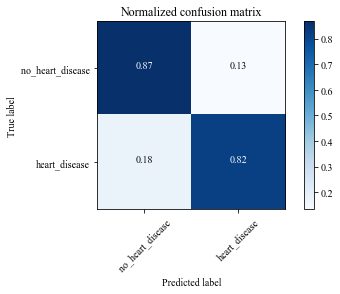

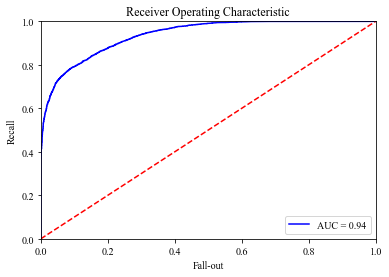

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    6.2s finished


('====Iteration', 5, ' ====')
('accuracy', 0.855)
('Precision:', 0.8586260216478905)
('Recall:', 0.8275494996806472)
('confusion matrix\n', array([[4663,  640],
       [ 810, 3887]]))
Confusion matrix, without normalization
[[4663  640]
 [ 810 3887]]
Normalized confusion matrix
[[0.88 0.12]
 [0.17 0.83]]


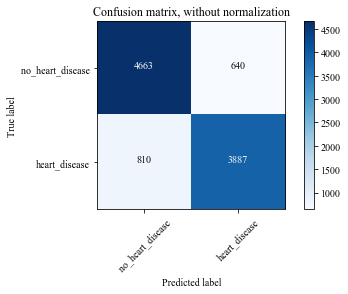

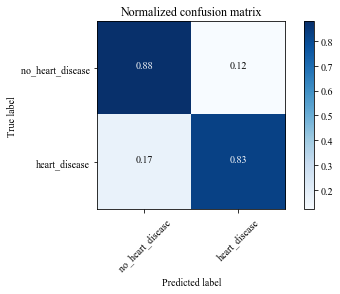

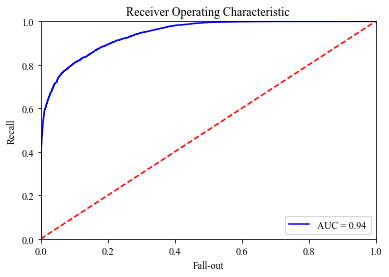

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    6.4s finished


('====Iteration', 6, ' ====')
('accuracy', 0.8557)
('Precision:', 0.8639821029082774)
('Recall:', 0.8222269533744944)
('confusion matrix\n', array([[4695,  608],
       [ 835, 3862]]))
Confusion matrix, without normalization
[[4695  608]
 [ 835 3862]]
Normalized confusion matrix
[[0.89 0.11]
 [0.18 0.82]]


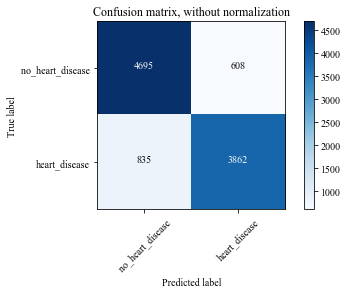

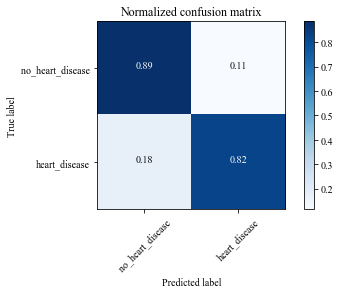

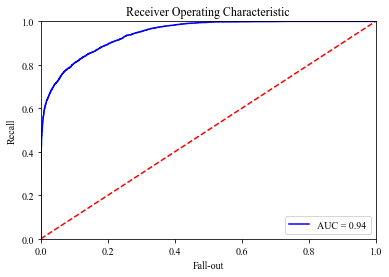

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    6.2s finished


('====Iteration', 7, ' ====')
('accuracy', 0.8483)
('Precision:', 0.8527062999112689)
('Recall:', 0.8183947200340643)
('confusion matrix\n', array([[4639,  664],
       [ 853, 3844]]))
Confusion matrix, without normalization
[[4639  664]
 [ 853 3844]]
Normalized confusion matrix
[[0.87 0.13]
 [0.18 0.82]]


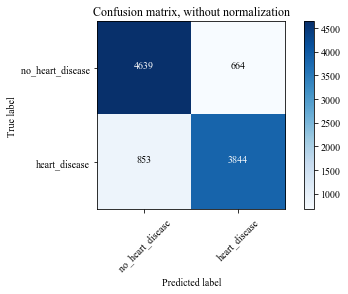

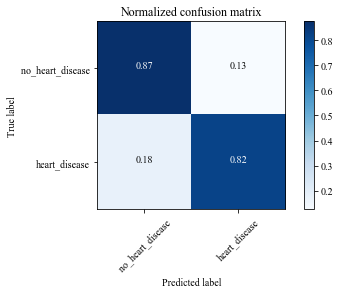

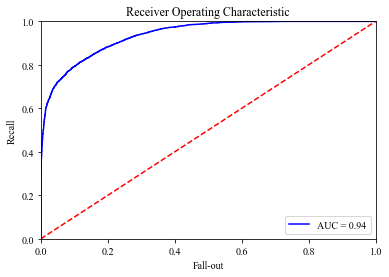

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    5.9s finished


('====Iteration', 8, ' ====')
('accuracy', 0.8483)
('Precision:', 0.8584310189359784)
('Recall:', 0.8107302533532041)
('confusion matrix\n', array([[4675,  628],
       [ 889, 3808]]))
Confusion matrix, without normalization
[[4675  628]
 [ 889 3808]]
Normalized confusion matrix
[[0.88 0.12]
 [0.19 0.81]]


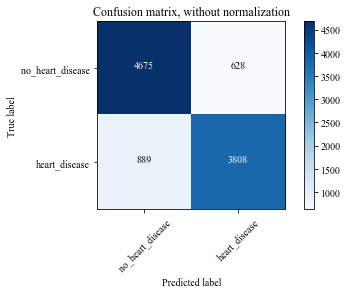

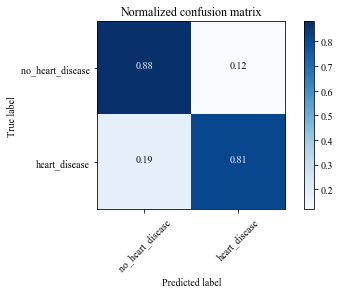

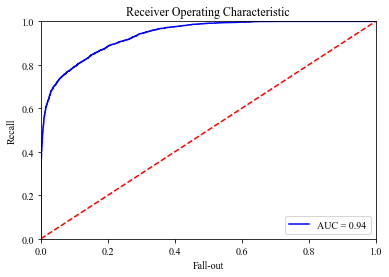

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    5.9s finished


('====Iteration', 9, ' ====')
('accuracy', 0.8394)
('Precision:', 0.8453631284916201)
('Recall:', 0.8054077070470513)
('confusion matrix\n', array([[4611,  692],
       [ 914, 3783]]))
Confusion matrix, without normalization
[[4611  692]
 [ 914 3783]]
Normalized confusion matrix
[[0.87 0.13]
 [0.19 0.81]]


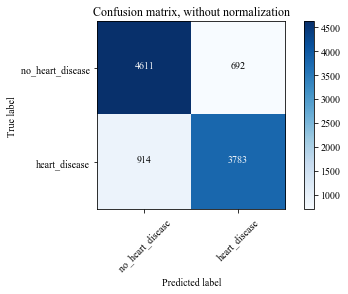

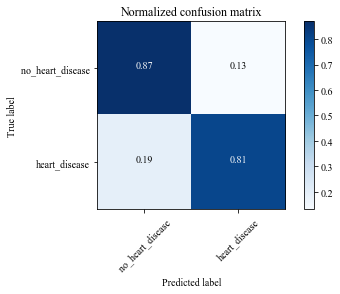

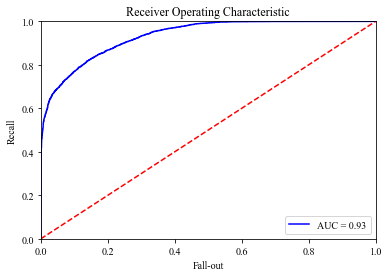

In [22]:
# Fine tune hyperparameters of classifier for best score
pipeline = Pipeline([('clf', RandomForestClassifier(criterion='gini'))])
parameters = {
'clf__max_depth': (300, 400, 500),
'clf__min_samples_split': (2, 3, 4),
'clf__min_samples_leaf': (2, 3, 4)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)
print ('Best score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

# Cross validation section
iter_num=0

# accumulate results 
rf_accuracy = np.zeros(num_cv_iterations)
rf_precision = np.zeros(num_cv_iterations)
rf_recall = np.zeros(num_cv_iterations)

# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(Xall,yall): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = Xall[train_indices]
    y_train = yall[train_indices]
    
    X_test = Xall[test_indices]
    y_test = yall[test_indices]
    
    # train the reusable logisitc regression model on the training data
    grid_search.fit(X_train,y_train)  # train object
    y_hat = grid_search.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    prec = precision_score(y_test, y_hat)
    rec = recall_score(y_test, y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    
    # accumulate results
    rf_accuracy[iter_num] = acc
    rf_precision[iter_num] = prec
    rf_recall[iter_num] = rec
    
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print('Precision:', prec)
    print('Recall:', rec)
    print("confusion matrix\n",conf)
    iter_num+=1
    y_pred = grid_search.predict(X_test)
    
    # plot confusion matrix
    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

    # Compute confusion matrix
    class_names = ['no_heart_disease','heart_disease']
    cnf_matrix = confusion_matrix(y_test, y_pred)

    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()
    
    # plot ROC Curve
    predictions = grid_search.predict_proba(X_test)
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions[:, 1])
    roc_auc = auc(false_positive_rate, recall)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out')
    plt.show()
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time'''

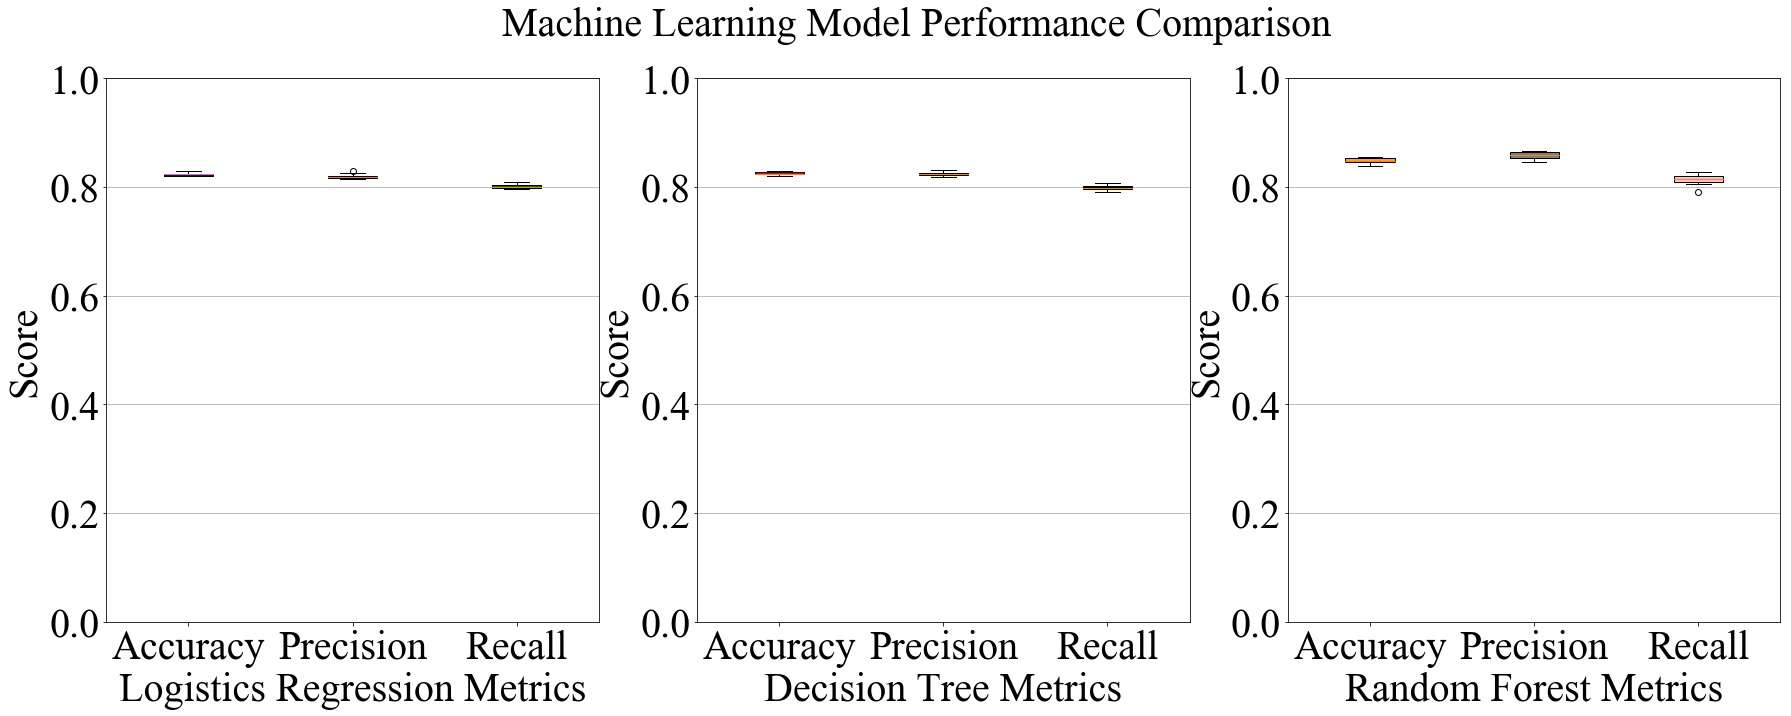

In [23]:


# plot metric comparison boxplots accross the 3 models

# plot data
lr_bplot = [lr_accuracy, lr_precision, lr_recall]
dt_bplot = [dt_accuracy, dt_precision, dt_recall]
rf_bplot = [rf_accuracy, rf_precision, rf_recall]

labels = ['Accuracy', 'Precision', 'Recall']

lr_colors = ['b', 'y', 'g']
dt_colors = ['r', 'c', 'k']
rf_colors = ['orange', 'gray', 'pink']

fig = plt.figure(figsize=(30,10))
fig.suptitle('Machine Learning Model Performance Comparison', fontsize=40)
# Logistics regression plot
a = fig.add_subplot(1,3,1)
a.tick_params(axis = 'both', which = 'major', labelsize = 40)
a.set_ylim(0,1)
lr_bplot = a.boxplot(lr_bplot, labels=labels,
                  vert=True, patch_artist=True)

# color the boxes
for bp in lr_bplot:
    for patch, color in zip(lr_bplot['boxes'], lr_colors):
        patch.set_facecolor(color)
        

a.yaxis.grid(True)

a.set_xlabel('Logistics Regression Metrics',fontsize=40)
a.set_ylabel('Score',fontsize=40)

# decision tree plot
b = fig.add_subplot(1,3,2)
b.tick_params(axis = 'both', which = 'major', labelsize = 40)
b.set_ylim(0,1)
dt_bplot = b.boxplot(dt_bplot, labels=labels,
                  vert=True, patch_artist=True)
# color the boxes
for bp in dt_bplot:
    for patch, color in zip(dt_bplot['boxes'], dt_colors):
        patch.set_facecolor(color)
        

b.yaxis.grid(True)
b.set_xlabel('Decision Tree Metrics',fontsize=40)
b.set_ylabel('Score',fontsize=40)

# random forest plot
c = fig.add_subplot(1,3,3, sharey=b)
c.tick_params(axis = 'both', which = 'major', labelsize = 40)
c.set_ylim(0,1)
rf_bplot = c.boxplot(rf_bplot, labels=labels,
                  vert=True, patch_artist=True)
# color the boxes
for bp in rf_bplot:
    for patch, color in zip(rf_bplot['boxes'], rf_colors):
        patch.set_facecolor(color)
        

c.yaxis.grid(True)
c.set_xlabel('Random Forest Metrics', fontsize=40)
c.set_ylabel('Score',fontsize=40)
    
plt.show()

